In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/country_wise_latest.csv')
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [ ]:
#removing any null values
columns_with_missing_values = df.columns[df.isnull().any()]
df.dropna(subset=columns_with_missing_values, inplace=True)

In [ ]:
# Remove duplicate rows
duplicate_rows = df.duplicated()
df.drop_duplicates(subset=None, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


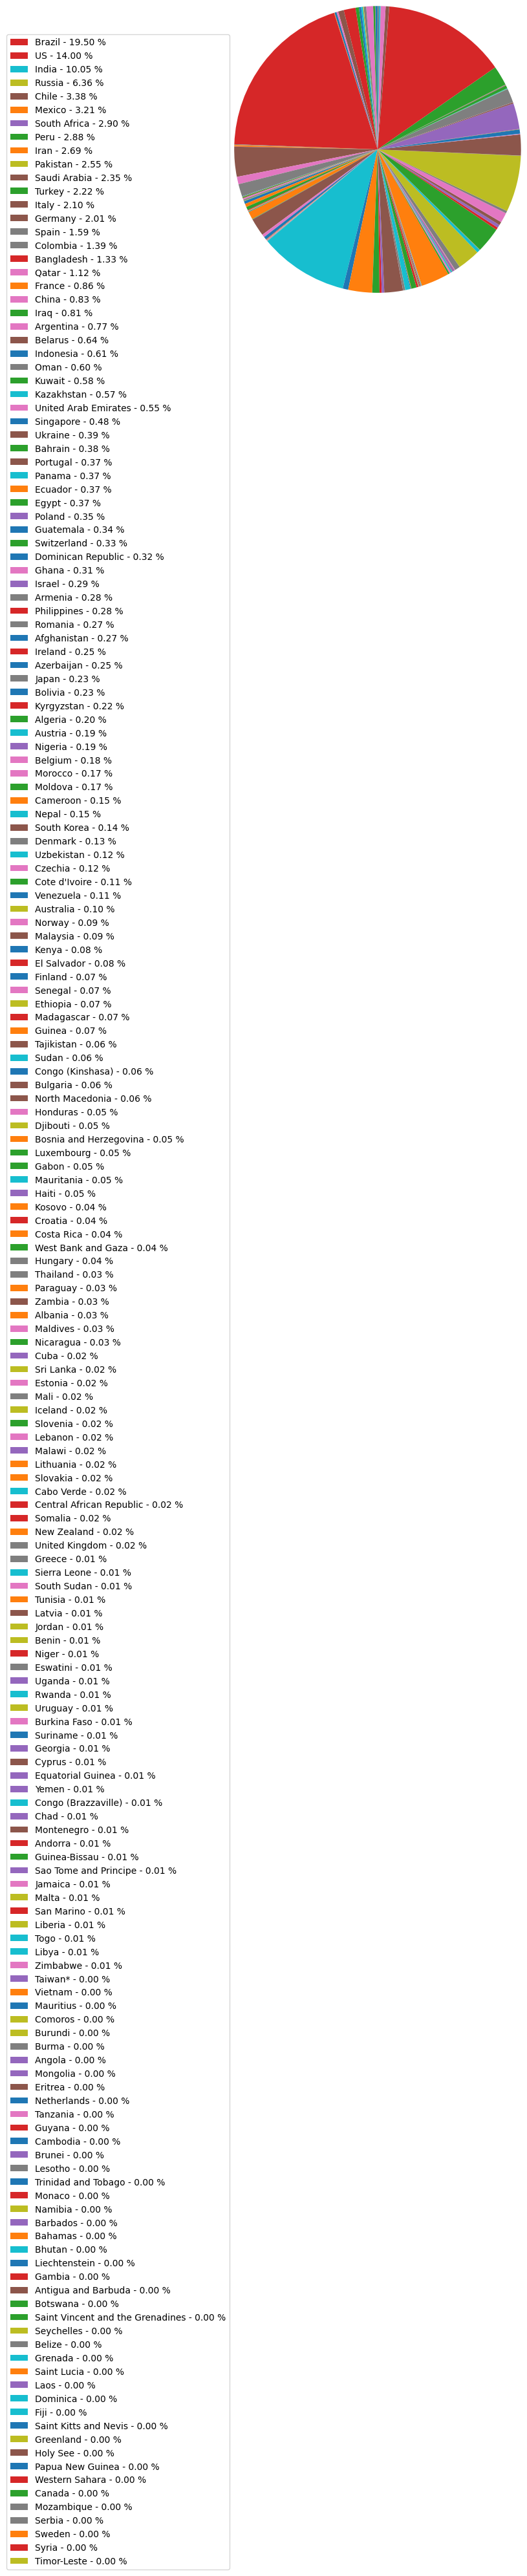

In [ ]:
x = df['Country/Region']
y = df['Recovered']
percent = (100 * y) / y.sum()
wedges, texts = plt.pie(y, startangle=90, radius=1.5)
labels = ['{0} - {1:.2f} %'.format(i, j) for i, j in zip(x, percent)]
wedges, labels, dummy = zip(*sorted(zip(wedges, labels, y),key=lambda x: x[2],reverse=True))
plt.legend(wedges, labels, bbox_to_anchor=(-0.1, 1), fontsize=10)


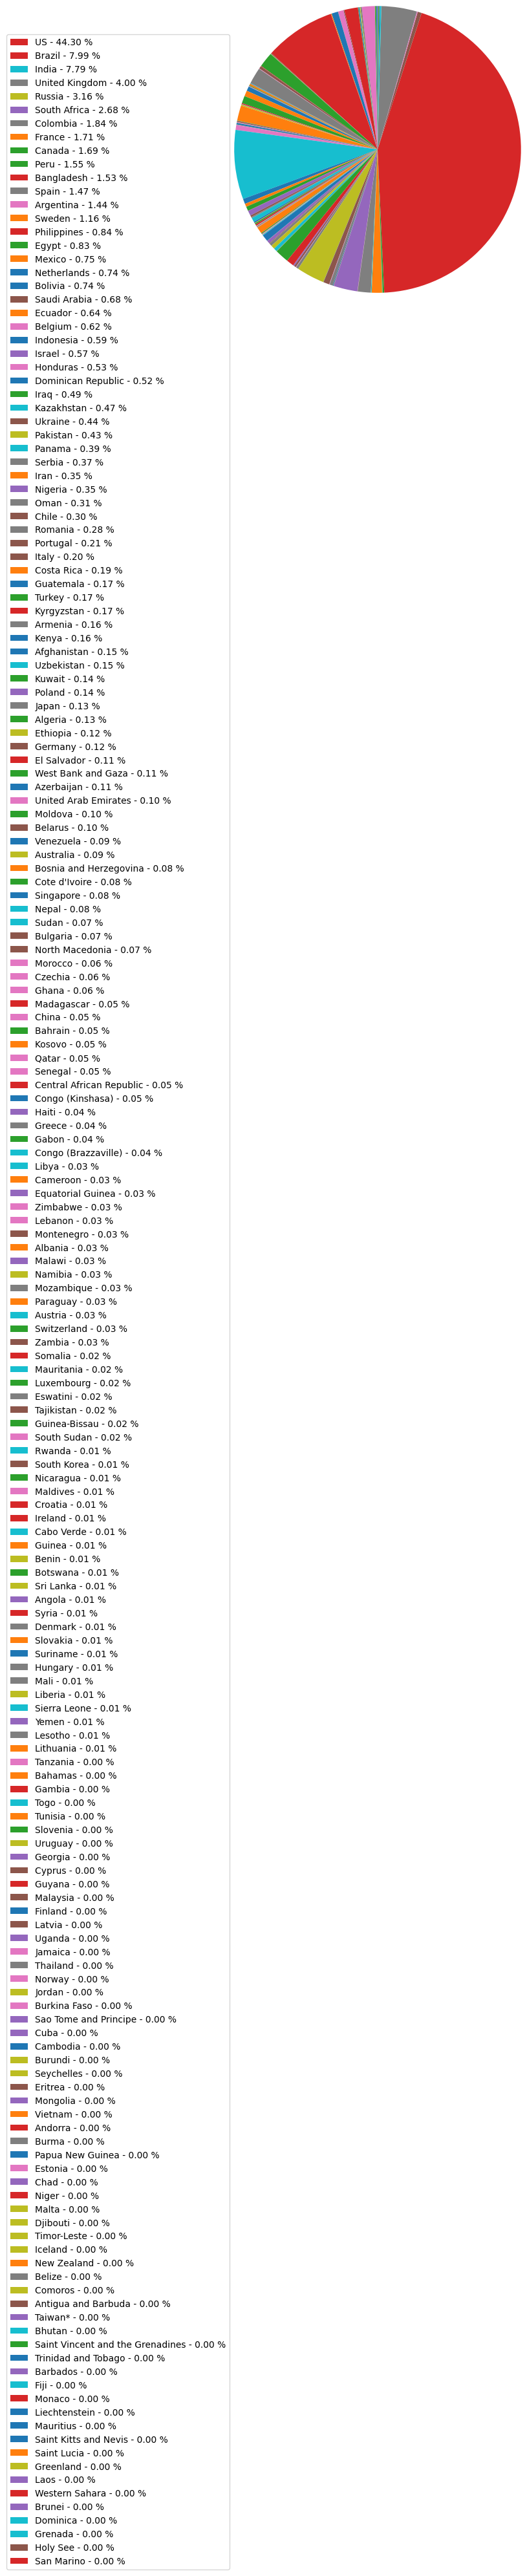

In [ ]:
z = df['Active']
percent = (100 * z) / z.sum()
wedges, texts = plt.pie(z, startangle=90, radius=1.5)
labels = ['{0} - {1:.2f} %'.format(i, j) for i, j in zip(x, percent)]
wedges, labels, dummy = zip(*sorted(zip(wedges, labels, z),key=lambda x: x[2],reverse=True))
plt.legend(wedges, labels, bbox_to_anchor=(-0.1, 1), fontsize=10)


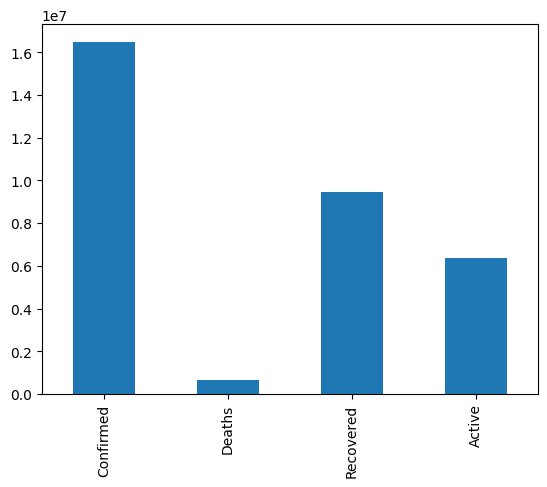

In [ ]:
column_names = ['Confirmed', 'Deaths', 'Recovered', 'Active']
column_sums = df[column_names].sum().plot(kind="bar")

In [ ]:
region = df.groupby(by='WHO Region').sum()
region

<ipython-input-10-49d3300b5ae1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region = df.groupby(by='WHO Region').sum()


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
WHO Region,,,,,,,,,,,,,
Africa,723207,12223,440645,270339,12176,353,14563,110.71,2736.71,NaN,608120,115087,868.15
Americas,8839286,342732,4468616,4027938,129531,3555,94776,106.84,2180.20,NaN,7815198,1024088,571.59
Eastern Mediterranean,1490744,38339,1201400,251005,12410,445,14843,78.39,1465.05,NaN,1398847,91897,230.61
Europe,3299523,211144,1993723,1094656,22294,304,11732,235.11,3843.56,NaN,3146816,152707,435.10
South-East Asia,1835297,41349,1156933,637015,48993,734,37582,12.96,667.04,19.56,1478283,357014,85.13
Western Pacific,292428,8249,206770,77409,3289,24,1127,20.64,1228.88,28.60,266359,26069,353.78


Text(0.5, 1.0, ' Recovered Region-Wise')

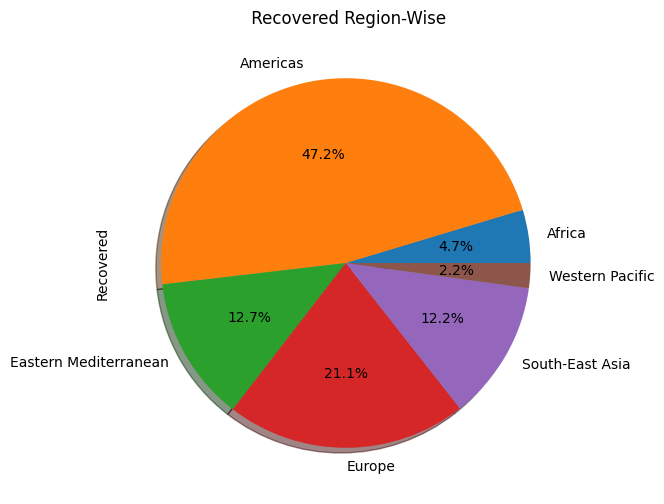

In [ ]:
region['Recovered'].plot(kind='pie',  figsize=(10,6), shadow=True, autopct='%1.1f%%')
plt.title(' Recovered Region-Wise')

Text(0.5, 1.0, ' Active Region-Wise')

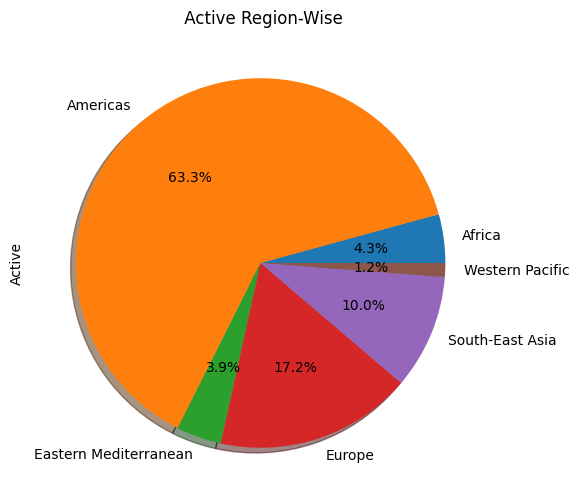

In [ ]:
region['Active'].plot(kind='pie', figsize=(10,6), shadow=True, autopct='%1.1f%%')
plt.title(' Active Region-Wise')

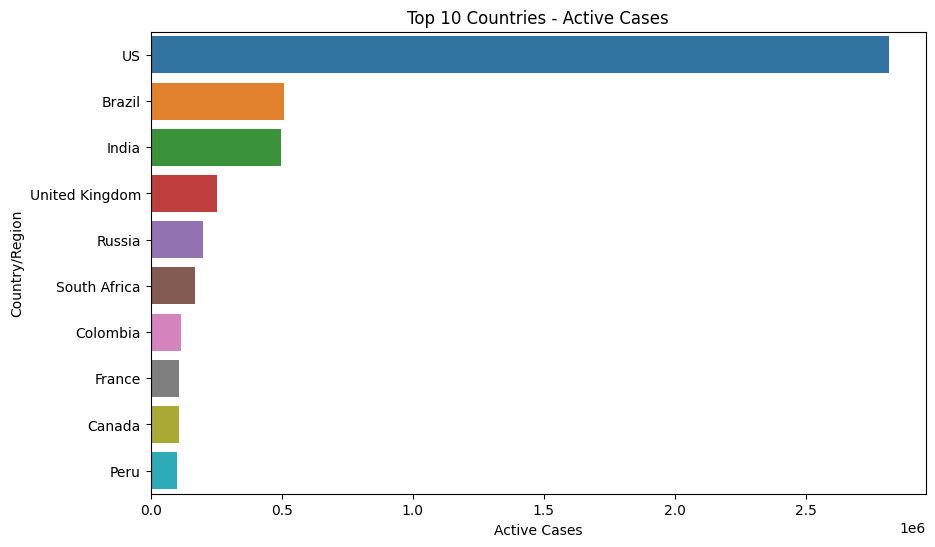

In [ ]:
# Top 10 countries for Active cases
top_10_active = df.nlargest(10, 'Active')
plt.figure(figsize=(10, 6))
sns.barplot(x='Active', y='Country/Region', data=top_10_active)
plt.title('Top 10 Countries - Active Cases')
plt.xlabel('Active Cases')
plt.ylabel('Country/Region')
plt.show()




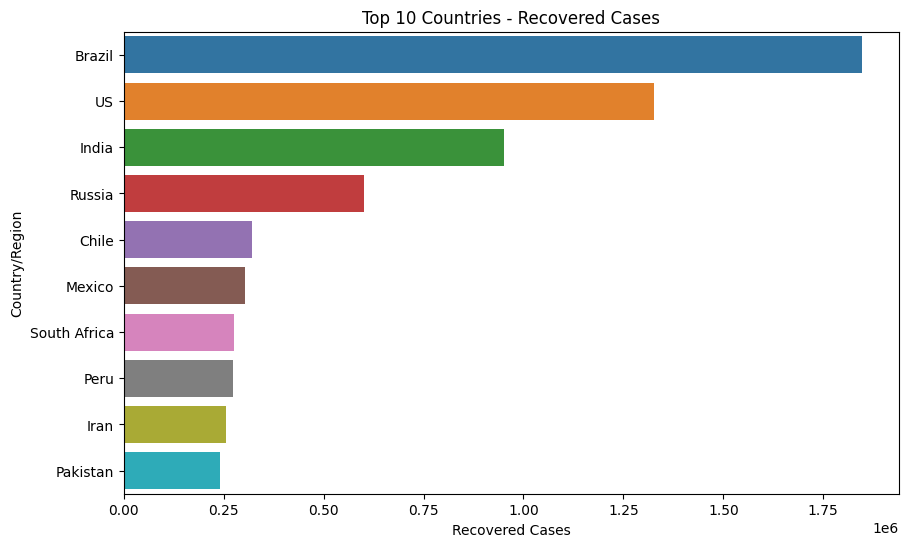

In [ ]:
# Top 10 countries for Recovered cases
top_10_recovered = df.nlargest(10, 'Recovered')
plt.figure(figsize=(10, 6))
sns.barplot(x='Recovered', y='Country/Region', data=top_10_recovered)
plt.title('Top 10 Countries - Recovered Cases')
plt.xlabel('Recovered Cases')
plt.ylabel('Country/Region')
plt.show()



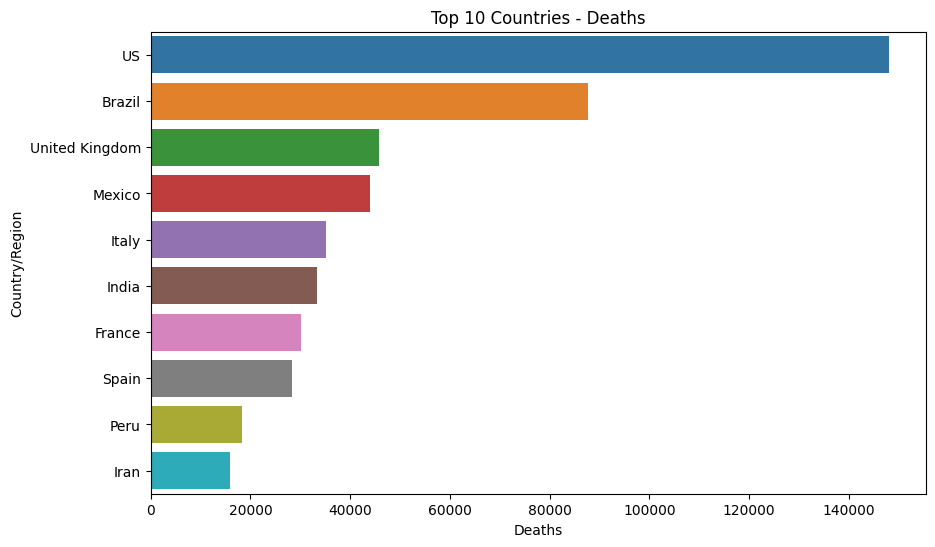

In [ ]:
# Top 10 countries for Deaths
top_10_deaths = df.nlargest(10, 'Deaths')
plt.figure(figsize=(10, 6))
sns.barplot(x='Deaths', y='Country/Region', data=top_10_deaths)
plt.title('Top 10 Countries - Deaths')
plt.xlabel('Deaths')
plt.ylabel('Country/Region')
plt.show()